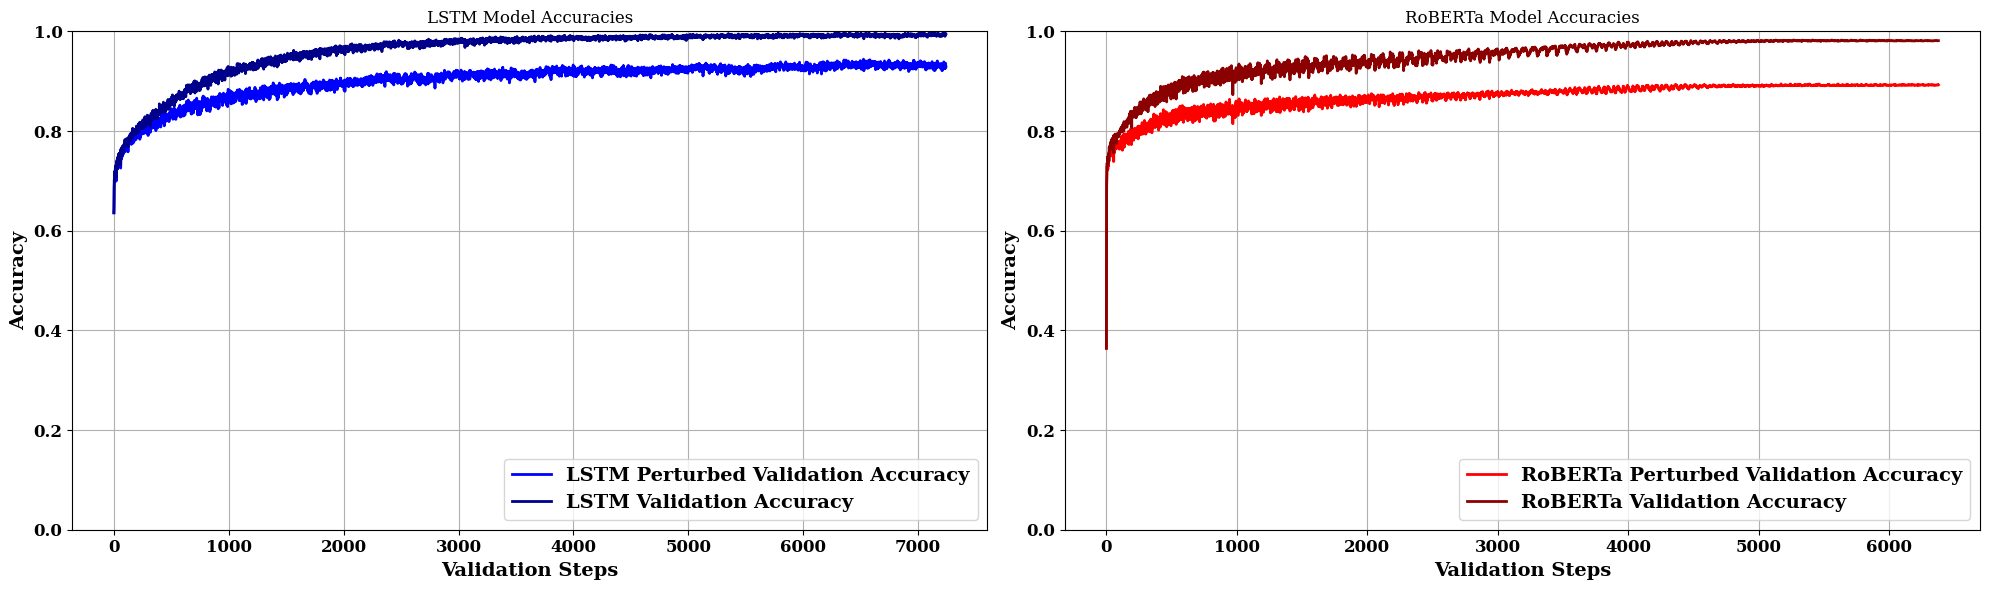

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re

# Paths to log files
lstm_log_file = '/home/tianyizhou/USC-SB-Transformer/logs/qqp_p/lstm/521_new_qqp_p/logfile.log'
roberta_log_file = '/home/tianyizhou/USC-SB-Transformer/logs/qqp_p/roberta-scratch/521_new_qqp_p/logfile.log'
# Function to extract accuracy and percentage differences from log file
def extract_metrics(log_file_path):
    perturbed_validation_acc = []
    validation_acc = []
    percentage_diffs = []

    with open(log_file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        if "extra_validation Accuracy:" in line:
            acc = float(re.findall(r"extra_validation Accuracy: ([0-9.]+)", line)[0])
            perturbed_validation_acc.append(acc)
        if "validation: Validation Accuracy:" in line:
            acc = float(re.findall(r"Validation Accuracy: ([0-9.]+)", line)[0])
            validation_acc.append(acc)
        if "validation: Percentage difference between extra_validation_all_val_acc and all_val_acc:" in line:
            diff = float(re.findall(r"Percentage difference between extra_validation_all_val_acc and all_val_acc: ([0-9.]+)", line)[0])
            percentage_diffs.append(diff)

    return np.array(perturbed_validation_acc), np.array(validation_acc), np.array(percentage_diffs)



# Extract accuracies
lstm_perturb_acc, lstm_validation_acc,lstm_percentage_diffs = extract_metrics(lstm_log_file)
roberta_perturb_acc, roberta_validation_acc,robeta_percentage_diffs = extract_metrics(roberta_log_file)

# Plotting setup
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["font.weight"] = 'bold'
plt.rcParams["axes.labelweight"] = "bold"
fontsize = 14

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot LSTM accuracies
ax1.plot(lstm_perturb_acc, label='LSTM Perturbed Validation Accuracy', color='blue', lw=2)
ax1.plot(lstm_validation_acc, label='LSTM Validation Accuracy', color='darkblue', lw=2)
ax1.set_title('LSTM Model Accuracies')
ax1.set_xlabel('Validation Steps', fontsize=fontsize)
ax1.set_ylabel('Accuracy', fontsize=fontsize)
ax1.legend(loc='lower right', fontsize=fontsize)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
ax1.grid(True)


# Plot RoBERTa accuracies
ax2.plot(roberta_perturb_acc, label='RoBERTa Perturbed Validation Accuracy', color='red', lw=2)
ax2.plot(roberta_validation_acc, label='RoBERTa Validation Accuracy', color='darkred', lw=2)
ax2.set_title('RoBERTa Model Accuracies')
ax2.set_xlabel('Validation Steps', fontsize=fontsize)
ax2.set_ylabel('Accuracy', fontsize=fontsize)
ax2.legend(loc='lower right', fontsize=fontsize)
ax2.xaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=12)
ax2.grid(True)
ax1.set_ylim(0, 1)  # Set y-axis limits to [0, 1]
ax2.set_ylim(0, 1)  # Set y-axis limits to [0, 1]
plt.tight_layout()
# Show plot
plt.show()


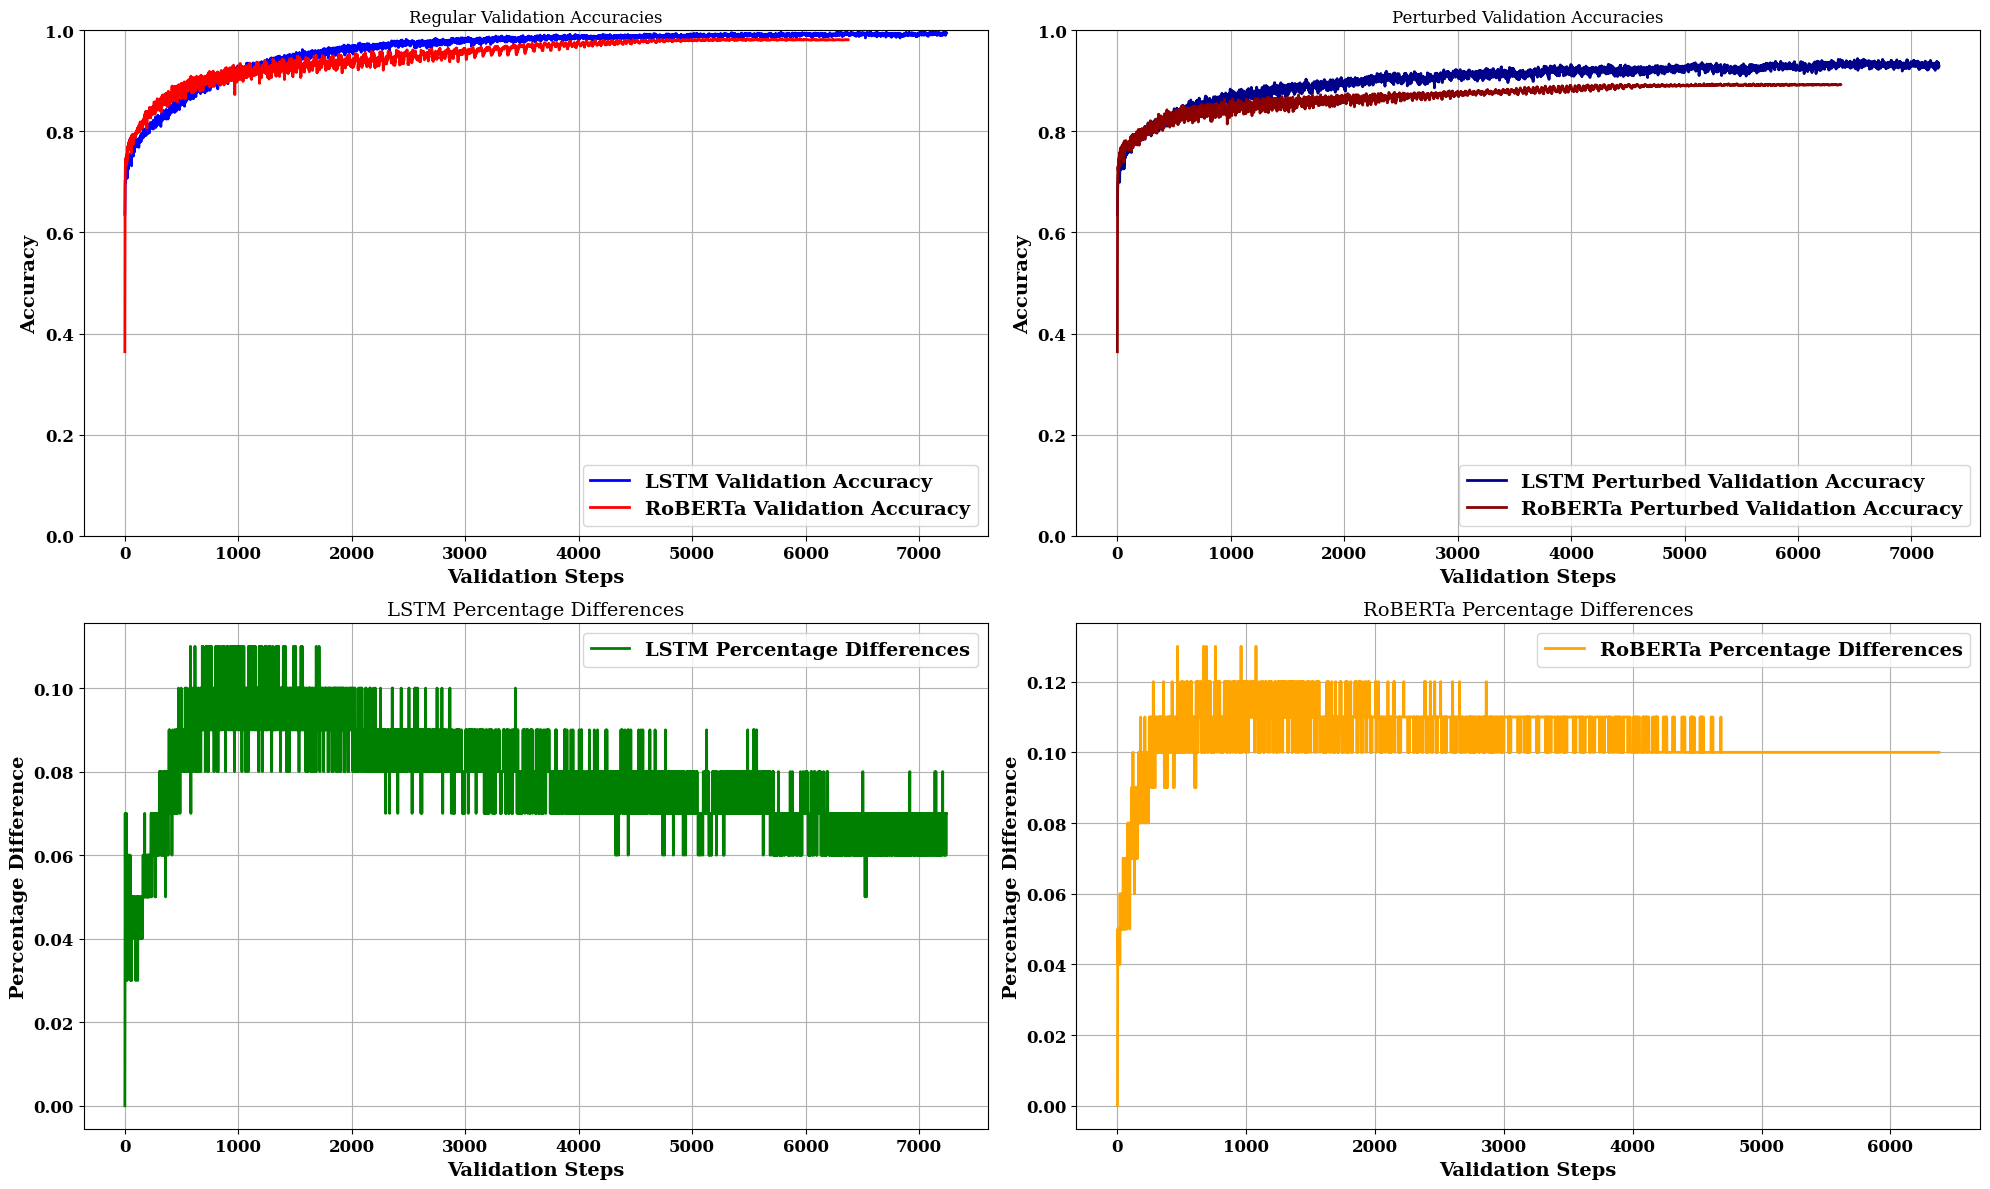

In [2]:

# Create a figure with two subplots (1 row, 2 columns)
# Create a figure with two rows and two columns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))


# Plot regular validation accuracies
ax1.plot(lstm_validation_acc, label='LSTM Validation Accuracy', color='blue', lw=2)
ax1.plot(roberta_validation_acc, label='RoBERTa Validation Accuracy', color='red', lw=2)
ax1.set_title('Regular Validation Accuracies')
ax1.set_xlabel('Validation Steps', fontsize=fontsize)
ax1.set_ylabel('Accuracy', fontsize=fontsize)
ax1.legend(loc='lower right', fontsize=fontsize)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
ax1.grid(True)

# Plot perturbed validation accuracies
ax2.plot(lstm_perturb_acc, label='LSTM Perturbed Validation Accuracy', color='darkblue', lw=2)
ax2.plot(roberta_perturb_acc, label='RoBERTa Perturbed Validation Accuracy', color='darkred', lw=2)
ax2.set_title('Perturbed Validation Accuracies')
ax2.set_xlabel('Validation Steps', fontsize=fontsize)
ax2.set_ylabel('Accuracy', fontsize=fontsize)
ax2.legend(loc='lower right', fontsize=fontsize)
ax2.xaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=12)
ax2.grid(True)



ax1.set_ylim(0, 1)  # Set y-axis limits to [0, 1]
ax2.set_ylim(0, 1)  # Set y-axis limits to [0, 1]

# Plot LSTM percentage differences
ax3.plot(lstm_percentage_diffs, label='LSTM Percentage Differences', color='green', lw=2)
ax3.set_title('LSTM Percentage Differences', fontsize=fontsize)
ax3.set_xlabel('Validation Steps', fontsize=fontsize)
ax3.set_ylabel('Percentage Difference', fontsize=fontsize)
ax3.legend(loc='upper right', fontsize=fontsize)
ax3.xaxis.set_tick_params(labelsize=12)
ax3.yaxis.set_tick_params(labelsize=12)
ax3.grid(True)

# Plot RoBERTa percentage differences
ax4.plot(robeta_percentage_diffs, label='RoBERTa Percentage Differences', color='orange', lw=2)
ax4.set_title('RoBERTa Percentage Differences', fontsize=fontsize)
ax4.set_xlabel('Validation Steps', fontsize=fontsize)
ax4.set_ylabel('Percentage Difference', fontsize=fontsize)
ax4.legend(loc='upper right', fontsize=fontsize)
ax4.xaxis.set_tick_params(labelsize=12)
ax4.yaxis.set_tick_params(labelsize=12)
ax4.grid(True)

plt.tight_layout()
plt.show()



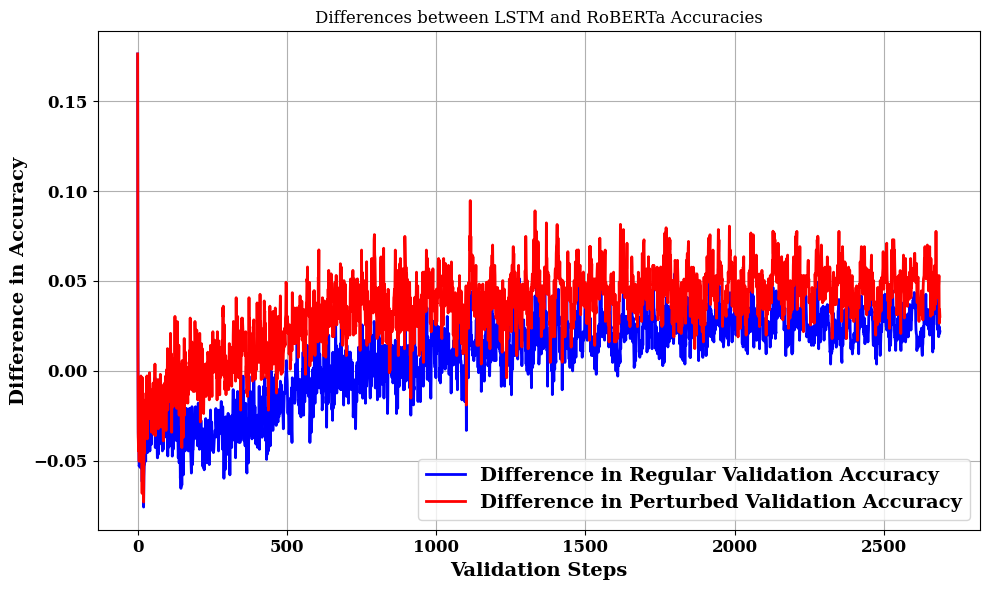

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import re

# Function to extract accuracy from log file
def extract_accuracies(log_file_path):
    perturbed_validation_acc = []
    validation_acc = []
    with open(log_file_path, 'r') as f:
        lines = f.readlines()
    for line in lines:
        if "extra_validation Accuracy:" in line:
            acc = float(re.findall(r"extra_validation Accuracy: ([0-9.]+)", line)[0])
            perturbed_validation_acc.append(acc)
        if "validation: Validation Accuracy:" in line:
            acc = float(re.findall(r"Validation Accuracy: ([0-9.]+)", line)[0])
            validation_acc.append(acc)
    return np.array(perturbed_validation_acc), np.array(validation_acc)

# Paths to log files
lstm_log_file = '/home/tianyizhou/USC-SB-Transformer/logs/qqp_p/lstm/qqp_perturb/logfile.log'
roberta_log_file = '/home/tianyizhou/USC-SB-Transformer/logs/qqp_p/roberta-scratch/variance-0.5/logfile.log'

# Extract accuracies
lstm_perturb_acc, lstm_validation_acc = extract_accuracies(lstm_log_file)
roberta_perturb_acc, roberta_validation_acc = extract_accuracies(roberta_log_file)

# Truncate to match sizes
min_length = min(len(lstm_validation_acc), len(roberta_validation_acc))
lstm_validation_acc = lstm_validation_acc[:min_length]
roberta_validation_acc = roberta_validation_acc[:min_length]

min_perturb_length = min(len(lstm_perturb_acc), len(roberta_perturb_acc))
lstm_perturb_acc = lstm_perturb_acc[:min_perturb_length]
roberta_perturb_acc = roberta_perturb_acc[:min_perturb_length]

# Compute differences
diff_validation_acc = lstm_validation_acc - roberta_validation_acc
diff_perturb_acc = lstm_perturb_acc - roberta_perturb_acc

# Plotting
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["font.weight"] = 'bold'
plt.rcParams["axes.labelweight"] = "bold"
fontsize = 14
fig, ax = plt.subplots(figsize=(10, 6))

# Plot differences
ax.plot(diff_validation_acc, label='Difference in Regular Validation Accuracy', color='blue', lw=2)
ax.plot(diff_perturb_acc, label='Difference in Perturbed Validation Accuracy', color='red', lw=2)

# Labels and legend
ax.set_title('Differences between LSTM and RoBERTa Accuracies')
ax.set_xlabel('Validation Steps', fontsize=fontsize)
ax.set_ylabel('Difference in Accuracy', fontsize=fontsize)
ax.legend(loc='lower right', fontsize=fontsize)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(True)
plt.tight_layout()
# Show plot
plt.show()
